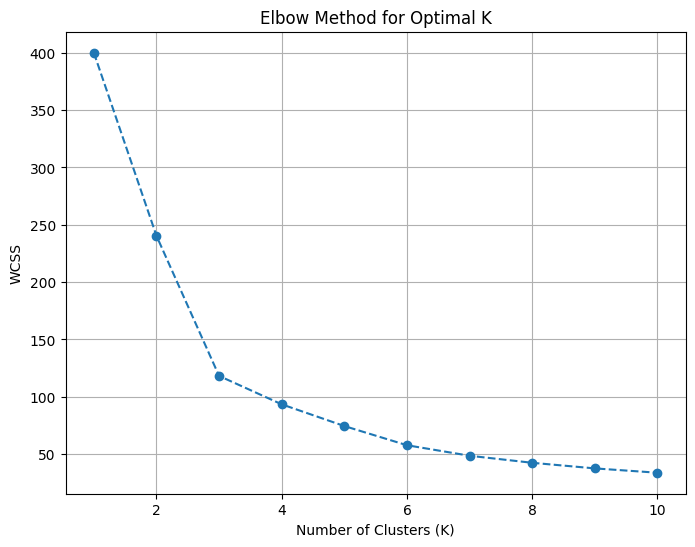

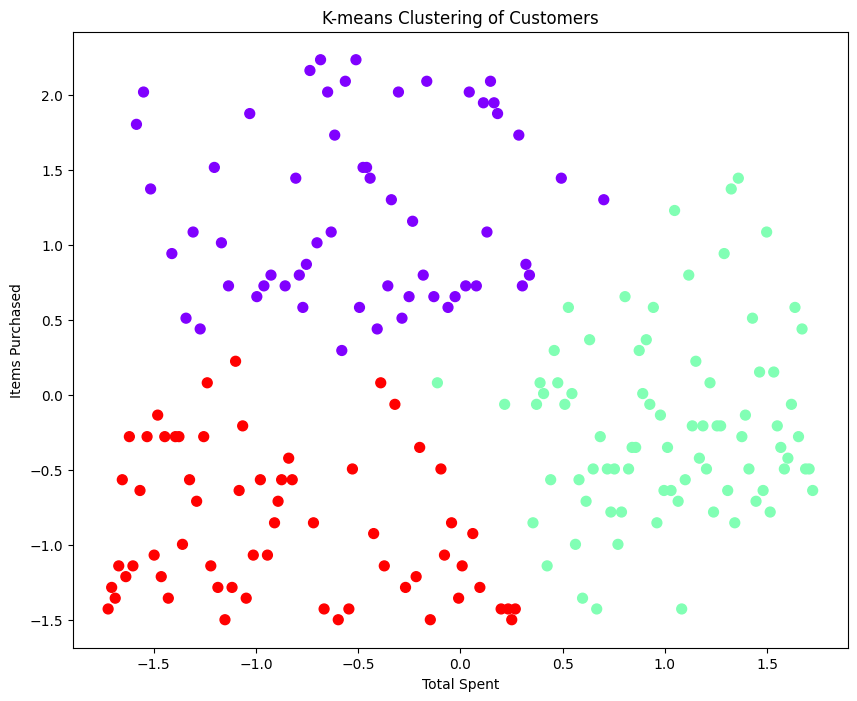

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your customer purchase data into a DataFrame
# Replace 'data.csv' with the path to your dataset
data = pd.read_csv('Mall_Customers.csv')

# Assuming your data has columns for customer ID and purchase history features
# Select the relevant features for clustering, e.g., 'TotalSpent', 'ItemsPurchased', etc.
X = data[['CustomerID', 'Age']]

# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Within-Cluster-Sum-of-Squares (WCSS) for different values of K
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Based on the elbow method plot, select an appropriate value for K
# Let's say we choose K = 3 (the "elbow point")

# Perform K-means clustering with the chosen K
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='rainbow', s=50)
plt.title('K-means Clustering of Customers')
plt.xlabel('Total Spent')
plt.ylabel('Items Purchased')
plt.show()

# You can now analyze and interpret the clusters to understand customer segments
